In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


In [3]:
train_dir = '/content/drive/MyDrive/IA 2/Proyecto_IA2/Bone Break Classification/train'
test_dir = '/content/drive/MyDrive/IA 2/Proyecto_IA2/Bone Break Classification/test'


def preprocess_image(image):
    # Convertir a escala de grises y luego expandir a tres canales para mantener la consistencia
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_image
)

test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_image)

# Cargar los datos desde las carpetas
train_generator = train_datagen.flow_from_directory(
    train_dir,   # Ruta a las imágenes de entrenamiento
    target_size=(128, 128),      # Tamaño de las imágenes
    batch_size=32,
    class_mode='categorical'     # Asume múltiples clases (más de 2)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,    # Ruta a las imágenes de prueba
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 703 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


In [ ]:
# Cargar el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Congelar las capas del modelo base
base_model.trainable = False

# Añadir capas personalizadas para clasificación
x = base_model.output
x = Flatten()(x)  # Aplanar la salida (de 4x4x512 a un vector de tamaño 8192)
x = Dense(6, activation='softmax')(x)  # Capa de salida para 6 clases

# Construir el modelo final
model = Model(inputs=base_model.input, outputs=x)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,    # Ajusta según sea necesario
    verbose=1
)

# Evaluar el modelo
loss, accuracy = model.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 262s 10s/step - accuracy: 0.1869 - loss: 1.9201 - val_accuracy: 0.2308 - val_loss: 1.7910
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 176s 8s/step - accuracy: 0.2147 - loss: 1.7631 - val_accuracy: 0.2418 - val_loss: 1.7385
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.2658 - loss: 1.7270 - val_accuracy: 0.3077 - val_loss: 1.6974
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 181s 8s/step - accuracy: 0.2773 - loss: 1.6860 - val_accuracy: 0.3407 - val_loss: 1.6771
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 185s 8s/step - accuracy: 0.3606 - loss: 1.6426 - val_accuracy: 0.3626 - val_loss: 1.6487
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 199s 8s/step - accuracy: 0.3478 - loss: 1.6267 - val_accuracy: 0.3846 - val_loss: 1.6295
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 179s 8s/step - accuracy: 0.3777 - loss: 1.5713 - val_accuracy: 0.4066 - val_loss: 1.6126
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.4165 - loss: 1.5497 - val_accuracy: 0.4176 - val_loss: 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.5417 - loss: 1.4110
Pérdida: 1.4516, Precisión: 0.5156
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.07      0.07      0.07        14
  Comminuted fracture       0.27      0.29      0.28        14
 Fracture Dislocation       0.29      0.32      0.30        19
  Greenstick fracture       0.24      0.25      0.24        16
    Hairline Fracture       0.14      0.10      0.12        10
Pathological fracture       0.24      0.22      0.23        18

             accuracy                           0.22        91
            macro avg       0.21      0.21      0.21        91
         weighted avg       0.22      0.22      0.22        91



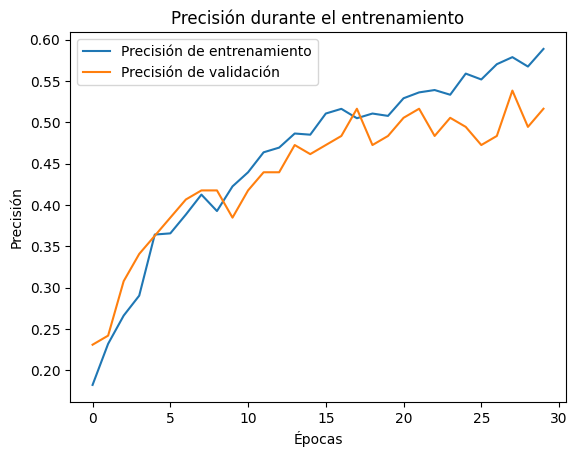

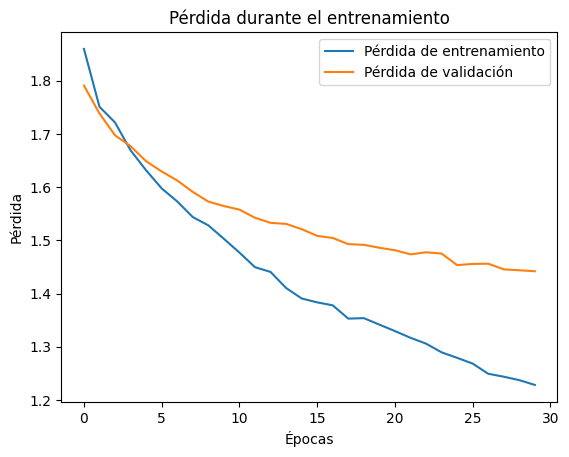

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Obtener predicciones y etiquetas verdaderas
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir las predicciones en clases
y_true = test_generator.classes[:len(y_pred_classes)]  # Asegurar que y_true y y_pred_classes tengan el mismo tamaño

# Generar el reporte de clasificación
class_names = list(test_generator.class_indices.keys())  # Nombres de las clases
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()


In [4]:
# Cargar el modelo base VGG16 preentrenado
model_2 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Congelar las capas del modelo base
model_2.trainable = False

# Agregar las capas personalizadas
x = model_2.output
x = Flatten()(x)                       # Aplana las características
x = Dense(512, activation='relu')(x)   # Capa totalmente conectada
x = BatchNormalization()(x)            # Normalización
x = Dropout(0.5)(x)                    # Regularización
x = Dense(256, activation='relu')(x)   # Otra capa totalmente conectada
x = Dropout(0.5)(x)                    # Regularización adicional
output = Dense(6, activation='softmax')(x)  # Capa de salida para 12 clases

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
# Construir el modelo final
model = Model(inputs=model_2.input, outputs=output)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,    # Ajusta según sea necesario
    verbose=1
)

# Evaluación del modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 547s 18s/step - accuracy: 0.1887 - loss: 2.7937 - val_accuracy: 0.1758 - val_loss: 1.8643
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 160s 7s/step - accuracy: 0.2360 - loss: 2.3881 - val_accuracy: 0.2198 - val_loss: 1.7751
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 202s 7s/step - accuracy: 0.3088 - loss: 2.1196 - val_accuracy: 0.2418 - val_loss: 1.7375
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 198s 7s/step - accuracy: 0.3399 - loss: 1.9365 - val_accuracy: 0.2637 - val_loss: 1.6537
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.3559 - loss: 1.9146 - val_accuracy: 0.2527 - val_loss: 1.6216
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.3702 - loss: 1.7868 - val_accuracy: 0.2967 - val_loss: 1.5993
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 156s 7s/step - accuracy: 0.3861 - loss: 1.7111 - val_accuracy: 0.3187 - val_loss: 1.5557
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 198s 7s/step - accuracy: 0.4534 - loss: 1.6531 - val_accuracy: 0.3077 - val_loss: 1

2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 12s/step - accuracy: 0.4792 - loss: 1.4519
Pérdida: 1.5081, Precisión: 0.4688
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.00      0.00      0.00        14
  Comminuted fracture       0.15      0.14      0.15        14
 Fracture Dislocation       0.28      0.37      0.32        19
  Greenstick fracture       0.18      0.19      0.18        16
    Hairline Fracture       0.08      0.10      0.09        10
Pathological fracture       0.20      0.22      0.21        18

             accuracy                           0.19        91
            macro avg       0.15      0.17      0.16        91
         weighted avg       0.16      0.19      0.17        91



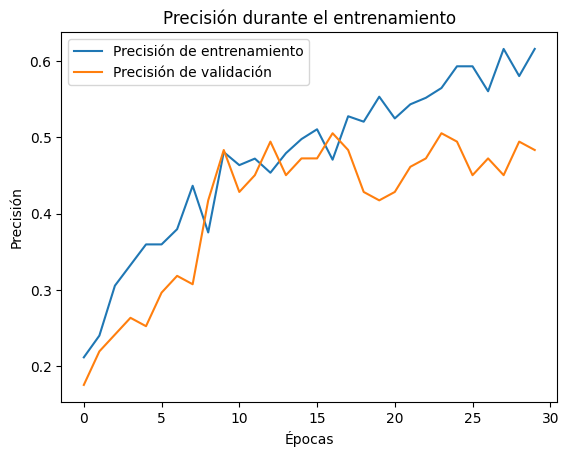

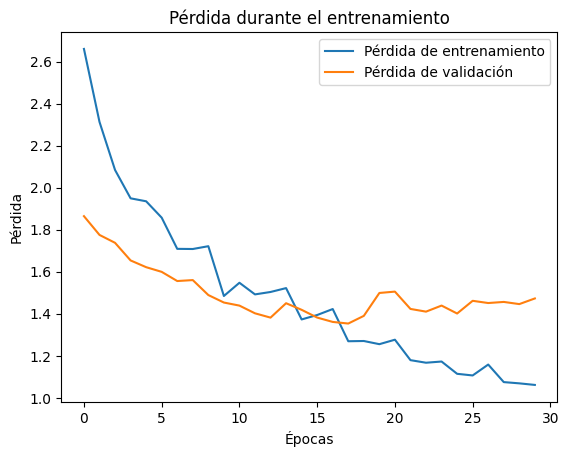

In [6]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Obtener predicciones y etiquetas verdaderas
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir las predicciones en clases
y_true = test_generator.classes[:len(y_pred_classes)]  # Asegurar que y_true y y_pred_classes tengan el mismo tamaño

# Generar el reporte de clasificación
class_names = list(test_generator.class_indices.keys())  # Nombres de las clases
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()


In [8]:
# Descongelar las últimas capas del modelo base
for layer in model_2.layers[-4:]:
    layer.trainable = True

# Compilar nuevamente el modelo con un learning rate más bajo
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar nuevamente
history_fine = model.fit(
    train_generator,
    epochs=10,  # Algunas pocas épocas adicionales
    validation_data=test_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 178s 8s/step - accuracy: 0.6315 - loss: 0.9984 - val_accuracy: 0.4688 - val_loss: 1.5701
Epoch 2/10
 1/21 ━━━━━━━━━━━━━━━━━━━━ 2:01 6s/step - accuracy: 0.5312 - loss: 1.3134

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 396ms/step - accuracy: 0.5312 - loss: 1.3134 - val_accuracy: 0.5556 - val_loss: 1.3175
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 169s 8s/step - accuracy: 0.5858 - loss: 1.1113 - val_accuracy: 0.4688 - val_loss: 1.4440
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 213ms/step - accuracy: 0.5000 - loss: 1.5367 - val_accuracy: 0.5556 - val_loss: 1.5099
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 173s 8s/step - accuracy: 0.6455 - loss: 0.9266 - val_accuracy: 0.4219 - val_loss: 1.6607
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.6250 - loss: 1.2056 - val_accuracy: 0.6667 - val_loss: 1.0063
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 186s 8s/step - accuracy: 0.6294 - loss: 0.9428 - val_accuracy: 0.5469 - val_loss: 1.3381
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5625 - loss: 1.0415 - val_accuracy: 0.4074 - val_loss: 1.6082
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 171s 8s/step - accuracy: 0.6737 - loss: 0.8485 - val_accuracy: 0.4688 - val_los

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 5s/step - accuracy: 0.4479 - loss: 1.5321
Pérdida: 1.4777, Precisión: 0.4688
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step
                       precision    recall  f1-score   support

    Avulsion fracture       0.09      0.07      0.08        14
  Comminuted fracture       0.18      0.21      0.19        14
 Fracture Dislocation       0.05      0.05      0.05        19
  Greenstick fracture       0.12      0.12      0.12        16
    Hairline Fracture       0.00      0.00      0.00        10
Pathological fracture       0.00      0.00      0.00        18

             accuracy                           0.08        91
            macro avg       0.07      0.08      0.07        91
         weighted avg       0.07      0.08      0.07        91



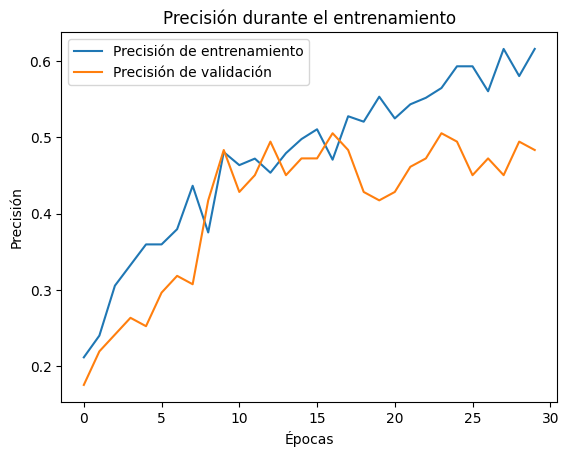

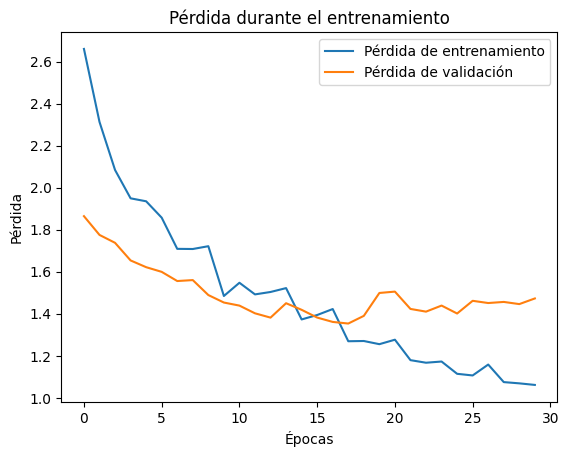

In [9]:
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy:.4f}')

# Obtener predicciones y etiquetas verdaderas
y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertir las predicciones en clases
y_true = test_generator.classes[:len(y_pred_classes)]  # Asegurar que y_true y y_pred_classes tengan el mismo tamaño

# Generar el reporte de clasificación
class_names = list(test_generator.class_indices.keys())  # Nombres de las clases
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print(report)

# Graficar precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()